<a href="https://colab.research.google.com/github/Sakshi9111/Image_classification/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [70]:
print(tf.__version__)

1.15.0


In [0]:
fashion_mnist= keras.datasets.fashion_mnist

In [0]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [0]:
class_names = ['t-shirt','top','trouser','pullover','dress','coat','sandal','shirt','sneakwer','bag','ankle boot']

In [74]:
train_images.shape

(60000, 28, 28)

In [75]:
test_images.shape

(10000, 28, 28)

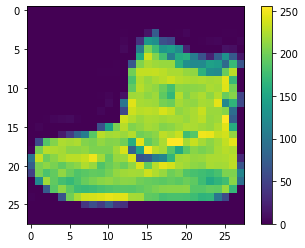

In [76]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/255


In [0]:
test_images = test_images/255

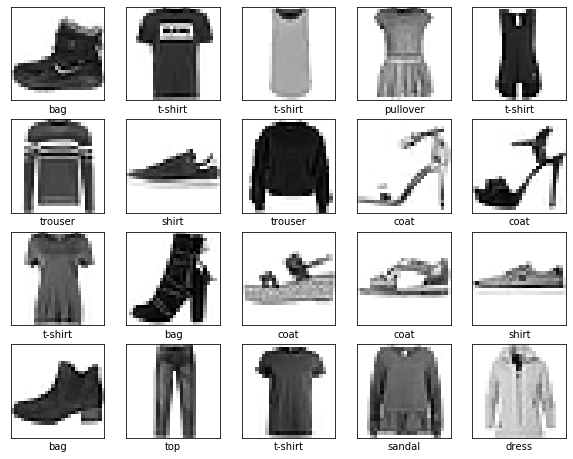

In [79]:
plt.figure(figsize=(10,10))
for i in range(20):
       plt.subplot(5,5,i+1)
       plt.xticks([])
       plt.yticks([])
       plt.grid([False])
       plt.imshow(train_images[i],cmap=plt.cm.binary)
       plt.xlabel(class_names[train_labels[i]])
       plt.show

In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation= tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)]
)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.5007 - acc: 0.8238
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3747 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3365 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3106 - acc: 0.8852
Epoch 5/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2948 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2793 - acc: 0.8963
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2700 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2574 - acc: 0.9037
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2492 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 

In [83]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy',test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3329 - acc: 0.8840
Test accuracy 0.884


In [0]:
predictions=model.predict(test_images)

In [85]:
predictions[0]

array([1.3355776e-06, 4.4873021e-09, 1.1125254e-09, 1.1334446e-10,
       3.4173750e-09, 1.4006589e-03, 2.7049303e-08, 3.6558293e-02,
       1.4158489e-05, 9.6202558e-01], dtype=float32)

In [0]:
def plot_image(i,predictions_array,true_label,img):
   predictions_array,true_label,img=predictions_array[i],true_label[i],img[i]
   plt.grid(False)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(img,cmap=plt.cm.binary)

   predicted_label=np.argmax(predictions_array)
   if predicted_label==true_label:
       color='blue'
   else:
      color='red'
    
   plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                 100*np.max(predictions_array),
                 class_names[true_label]),
                 color=color)

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisspot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

NameError: ignored

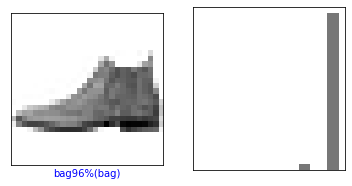

In [90]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()